# 기말고사 대체과제
###                                                 201801587 이재혁

---

# <span style="color:blue">지정주제</span>

### 한국 영화 '지금 만나러 갑니다' 리뷰 분석

이 영화는 2018년에 개봉한 영화로 2018년은 내가 첫 성인이 된 해이다. 개강하고 학기 중에 보러 간 기억이 있다. 영화 내용 중 아들의 학예회 발표 장면을 보며 눈물을 훔쳤던 기억이 아직도 생생하다. 현실적으로 불가능한 내용이지만 남은 가족들의 간절함과 슬픔과 그걸 또 이겨냈다는 그 서사가 굉장히 감동적이었다. 그래서 이 영화를 선택했다.

In [1]:
from selenium import webdriver

driver = webdriver.Chrome(r"C:\Users\jaehy\Downloads\driver\chromedriver.exe")

C:\Users\jaehy\AppData\Local\Temp/ipykernel_7580/1756175631.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\jaehy\Downloads\driver\chromedriver.exe")


한국 영화 '지금 만나러 갑니다' 평점 화면 url

In [2]:
main_url = "https://movie.daum.net/moviedb/grade?movieId=115112"
driver.get(main_url)

# 1번 영화 리뷰 가져오기

### 교수님께서 정해주신 최대 댓글 5000개 미만이기 때문에 전체 댓글을 끝까지 긁어올 수 있도록 더보기를 클릭하도록 했다. 

무리가 가지 않도록 각 동작에 sleep(3)을 이용하였다.

In [3]:
import time
time.sleep(3)
while True:
    try:
        more_xpath = '//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'
        driver.find_element('xpath', more_xpath).click()
        time.sleep(3)
    except:
        break

### BeautifulSoup 이용하여 위의 Selenium작업이 수행된 페이지를 받아서 원하는 부분을 크롤링

evaluation_lists에는 평점만 정하고 글로 된 평가가 없는 글들을 제외한 리뷰들을 저장했다.

In [4]:
from bs4 import BeautifulSoup

html = driver.page_source  # 현재 셀레니움으로 띄워져 있는 사이트에 대한 html을 가져와 저장했다.

soup = BeautifulSoup(html, 'html.parser')
evaluations = soup.find_all('div', {'class':'cmt_info'})

evaluation_lists = []
all_comment = [] # 워드클라우드를 만들기 위해 comment들만 따로 저장시키기 위한 배열

for evaluation in evaluations:
    if evaluation.find('p') is not None:
        comment = evaluation.find('p').text.strip(' \n')
        point = int(evaluation.find('div').text.strip(' \n'))
        all_comment.append(comment)  # 전체 리뷰를 담기 위한 all_comment에 comment들을 저장한다.
        if point == 10:
            label = 'pos'
            evaluation_lists.append((comment, label))
        elif point < 6: 
            label = 'neg'
            evaluation_lists.append((comment, label))
        

### html = driver.page_source

위 코드는 셀레니움으로 찾아 들어간 현재 사이트를 불러와 저장하는 기능을 한다. 이 명령어를 사용하지 않으면 selenium으로 작업한 페이지를 받아올 수 없어서 전체 리뷰를 받아올 수 없다. 그래서 **driver.page_source**를 이용해 모든 리뷰가 보이는 그 페이지를 불러와 작업할 수 있도록 한다.


평가와 평점을 크롤링 해오면서 평점이 **10점인 평은 긍정 리뷰**로, **6점 미만인 평은 부정 리뷰**로 바로 나눠서 evaluation_lists에 저장되도록 했다.

확실한 긍정, 확실한 부정으로 나누기위해 위와 같은 기준으로 나눴다.

그와 동시에 all_comment 배열에 comment들을 모두 넣으며 워드클라우드를 그릴 때 쓸 수 있도록 하였다.

---

# 2번 워드 클라우드 그리기~

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
okt = Okt()

#### 긍정 리뷰는 pos_comment, 부정 리뷰는 neg_comment에 저장하도록 했다.

뒤에 label은 빼고 index 0 값인 글로 되어있는 평가만 저장했다.

#### 전체 리뷰를 담는 all_comment는 위에서 evaluation_lists를 생성하면서 만들었다.

In [6]:
pos_comment = []
neg_comment = []

for comment in evaluation_lists:
    
    if comment[1] == 'pos':
        pos_comment.append(comment[0])
    else:
        neg_comment.append(comment[0])
        

#### 워드 클라우드를 그리기 위해 배열 각 요소, 즉 각 문장들을 합쳐서 하나의 문장으로 join시키고 명사들만 리스트에 남겼다.

#### 워드 클라우드를 그리기 위해 각 리뷰 리스트들을 Counter를 이용해 개수 파악을 했다.

In [7]:
all_doc = '\n'.join(all_comment)
all_doc_noun = okt.nouns(all_doc)
all_count = Counter(all_doc_noun)

pos_doc = '\n'.join(pos_comment)
pos_doc_noun = okt.nouns(pos_doc)
pos_count = Counter(pos_doc_noun)

neg_doc = '\n'.join(neg_comment)
neg_doc_noun = okt.nouns(neg_doc)
neg_count = Counter(neg_doc_noun)

# 배경은 흰색, 단어는 최대 2000개, 한글이 나올 수 있도록 폰트도 설정해주었다.
wc = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\malgun.ttf')

## 워드 클라우드

#### 의미 없는 단어 처리하기

단어만 봤을 때 글쓴이의 의도를 파악하기 힘들고 자주 등장하기만 하는 길이가 2 이상인 단어들은 미리 리스트에 추가해 워드클라우드를 그리는 데에 불필요한 단어들을 지웠다.

In [8]:
stopword_list = ['진짜', '너무', '바로', '엄청', '정말', '완전','영화', '원작', '보고']

for short_word in all_count:
    if len(short_word) == 1:
        stopword_list.append(short_word)
        
for stopword in stopword_list:
    if stopword in all_count:
        all_count.pop(stopword)
        
    if stopword in pos_count:
        pos_count.pop(stopword) 
        
    if stopword in neg_count:
        neg_count.pop(stopword)

### 전체 리뷰 워드 클라우드

In [9]:
wc_all = wc.generate_from_frequencies(all_count)
all_count.most_common(20)

[('손예진', 229),
 ('소지섭', 156),
 ('연기', 133),
 ('감동', 128),
 ('배우', 111),
 ('사랑', 82),
 ('생각', 74),
 ('눈물', 72),
 ('일본', 66),
 ('스토리', 57),
 ('느낌', 56),
 ('감성', 53),
 ('리메이크', 53),
 ('멜로', 48),
 ('가슴', 46),
 ('사람', 45),
 ('지금', 45),
 ('여운', 45),
 ('그냥', 40),
 ('마음', 39)]

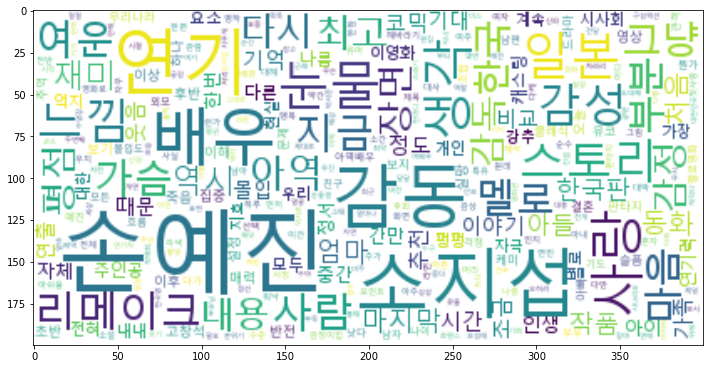

In [10]:
plt.figure(figsize=(12,8))
plt.imshow(wc_all, interpolation='bilinear')
plt.show()

전체적으로 두 주연 배우의 이름을 언급하며 리뷰를 작성한 사람들이 많았다. 영화 내용과 걸맞게 사랑, 감동, 멜로, 여운 등과 같은 단어들이 주로 사용된 것을 볼 수 있다. 아무래도 원작인 일본 영화를 리메이크한 한국 영화이다 보니 원작 영화에 관한 언급도 많았다. 단어들의 분위기가 대체로 긍정적인 것으로 보아 전체 평점이 높을 것이라 볼 수 있고, 부정적인 단어들은 긍정적인 의미를 갖는 단어들보다 적은 것으로 보아 부정적인 리뷰는 적은 것을 알 수 있다.

---

### 긍정 리뷰 워드 클라우드

In [11]:
wc_pos = wc.generate_from_frequencies(pos_count)
pos_count.most_common(20)

[('손예진', 89),
 ('감동', 75),
 ('소지섭', 65),
 ('연기', 60),
 ('눈물', 46),
 ('사랑', 43),
 ('배우', 39),
 ('여운', 31),
 ('생각', 28),
 ('가슴', 28),
 ('최고', 28),
 ('일본', 27),
 ('지금', 25),
 ('감성', 23),
 ('마음', 22),
 ('스토리', 21),
 ('한국', 19),
 ('멜로', 18),
 ('사람', 17),
 ('감정', 17)]

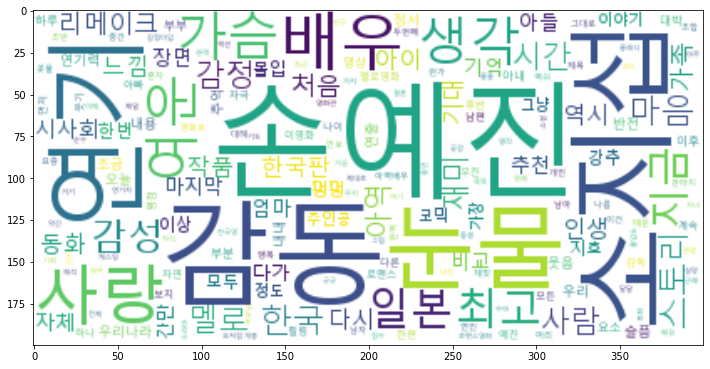

In [12]:
plt.figure(figsize=(12,8))
plt.imshow(wc_pos, interpolation='bilinear')
plt.show()

처음에는 평점 7점 이상이라면 긍정으로 판단하여 pos로 label하고, 7점 미만이라면 neg로 label하였다. 근데 워드클라우드를 그리는 중 확실한 긍정적인 리뷰들로만 하지 않으니까 간혹 부정적인 단어들이 껴있는 것을 볼 수 있었다. 그래서 확실한 긍정적 리뷰들인 평점 10점짜리의 리뷰들로만 긍정적인 워드클라우드를 완성시켰다. 10점 리뷰들의 갯수가 가장 많아 워드클라우드를 채우는 데에는 문제가 없을 것이라 판단했다. 그 결과 위에 보이는 단어들은 확실한 긍정 리뷰들에 담겨있는 단어들이라 볼 수 있다.

우선, 두 주연 배우에 대한 긍정적인 내용이 많고, 배우들의 연기에 대한 칭찬도 많다. 영화 자체가 멜로, 사랑, 감동, 가족 영화이다 보니 사람들이 이 부분들에 대해 느낀 부분이 많은 것 같다. 나도 영화를 볼 때 슬픈 장면들도 있었는데 사람들도 그에 대한 내용들을 눈물, 여운 등으로 표현한 것 같다.

---

### 부정 리뷰 워드 클라우드

In [13]:
wc_neg = wc.generate_from_frequencies(neg_count)
neg_count.most_common(20)

[('손예진', 32),
 ('배우', 32),
 ('소지섭', 28),
 ('연기', 24),
 ('생각', 22),
 ('평점', 21),
 ('감동', 20),
 ('감독', 20),
 ('그냥', 17),
 ('느낌', 14),
 ('사람', 14),
 ('리메이크', 13),
 ('일본', 12),
 ('스토리', 11),
 ('정도', 11),
 ('전혀', 10),
 ('억지', 10),
 ('몰입', 9),
 ('연출', 9),
 ('아역', 9)]

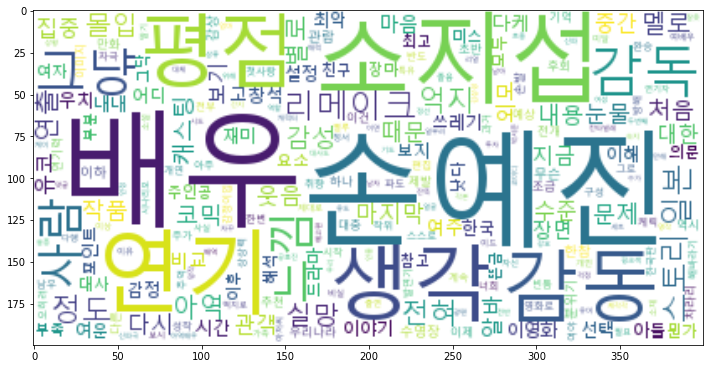

In [14]:
plt.figure(figsize=(12,8))
plt.imshow(wc_neg, interpolation='bilinear')
plt.show()

부정적인 리뷰들은 5점 이하인 리뷰들을 가지고 만들었다. 이 역시 애매한 점수들에서 있던 리뷰들은 제거하고 사람들의 특성상 5점부터는 확실한 부정을 표현하는 리뷰들이 많아서 5점으로 정했다. 

부정적인 리뷰들에서도 두 주연 배우의 이름은 많이 언급되었다. 전과 다른 점은 부정리뷰에 올라왔다는 점에서 연기에 대한 혹평이나 캐스팅 미스와 같은 점들을 집어 부정적으로 평가했을 것이라 생각한다. 또 감동이 적고 몰입이 안돼서 실망스럽고 기대 이하라는 평가도 볼 수 있다.

전체적으로 단어들의 어감이 부정적인 느낌이 많다. 전혀, 억지, 별로, 작위, 그닥 등 전체 글에서 명사로 뽑아낸 단어들로도 내가 분석하고자 하는 글의 분위기를 파악할 수 있는 것을 알았다.

---

# 3번 나이브 베이즈

### 1번에서 완성시킨 evaluation_lists를 가져와 학습시킨다.

In [15]:
import math

class MyNaiveBayesClassifier:
    
    def __init__(self, k = 0.5, use_morph=True):
        self.k = k
        self.word_probs = []
        self.use_morph = use_morph
        
        if self.use_morph:
            from konlpy.tag import Okt
            self.okt = Okt()
            
    def load_data(self, eval_lists):
        docs = []
        labels = []
        for line in eval_lists:
            doc, label = line[0], line[1]
            docs.append(doc)
            labels.append(label)
                
        return docs[:], labels[:]
    
    def tokenize(self, sentence):
        if self.use_morph:
            pos_sent = []
    
            sent = okt.pos(sentence, norm=True, stem=True)

            for tup in sent:
                word, tag = tup[0], tup[1]
                word_tag = word + '/' + tag
                pos_sent.append(word_tag)
            sentence = ' '.join(pos_sent)
            
        return sentence.split()
    
    def count_words(self, docs, labels):
        
        count_dict = dict()
        for doc, label in zip(docs, labels):
            for word in self.tokenize(doc):
                if word not in count_dict:
                    count_dict[word] = {'pos' : 0, 'neg' : 0}
                count_dict[word][label] += 1
        print('num of words...', len(count_dict))
        return count_dict
    
    def word_prob(self, count_dict, pos_class_num, neg_class_num, k):
        
        word_prob_list = []
        
        for key in count_dict:
            pos_word_num = count_dict[key]['pos']
            neg_word_num = count_dict[key]['neg']
            
            pos_class_prob = (pos_word_num + k) / (pos_class_num + 2*k)
            neg_class_prob = (neg_word_num + k) / (neg_class_num + 2*k)
            
            tup = (key, pos_class_prob, neg_class_prob)
            word_prob_list.append(tup)
        return word_prob_list
        
    def class_prob(self, word_prob_list, test_sentence, use_unseen=False):
        
        # p(긍정|문장), p(부정|문장) 계산
        
        test_words = self.tokenize(test_sentence)
        
        sent_log_pos_class_prob, sent_log_neg_class_prob = 0.0, 0.0
        
        for word, word_pos_class_prob, word_neg_class_prob in word_prob_list:
            if word in test_words:
                sent_log_pos_class_prob = sent_log_pos_class_prob + math.log(word_pos_class_prob)
                sent_log_neg_class_prob = sent_log_neg_class_prob + math.log(word_neg_class_prob)
            else:
                if use_unseen:
                    sent_log_pos_class_prob = sent_log_pos_class_prob + math.log(1.0 - word_pos_class_prob)
                    sent_log_neg_class_prob = sent_log_neg_class_prob + math.log(1.0 - word_neg_class_prob)
        
        sent_pos_class_prob = math.exp(sent_log_pos_class_prob)
        sent_neg_class_prob = math.exp(sent_log_neg_class_prob)
        
        pos_class_prob = sent_pos_class_prob/(sent_pos_class_prob+sent_neg_class_prob)
        neg_class_prob = sent_neg_class_prob/(sent_pos_class_prob+sent_neg_class_prob)
        
        return pos_class_prob, neg_class_prob
    
    def train(self, eval_lists):
        
        train_docs, train_labels = self.load_data(eval_lists)
        
        word_count_dict = self.count_words(train_docs, train_labels)
        
        pos_class_num = len([label for label in train_labels if label == 'pos'])
        neg_class_num = len([label for label in train_labels if label == 'neg'])
        
        self.word_probs = self.word_prob(word_count_dict, pos_class_num, neg_class_num, self.k)
        
    def classify(self, doc, use_unseen=False):
        
        pos_class_prob, neg_class_prob = self.class_prob(self.word_probs, doc, use_unseen)
        
        if pos_class_prob > neg_class_prob:
            print('pos', pos_class_prob)
        else:
            print('neg', neg_class_prob)

한글은 어절로 나누는 것보다 형태소로 나누어 글을 판단하는 것이 정확하다고 생각해서 use_morph는 True로 하여 형태소로 나누어 분류기 학습을 시켰다.

In [16]:
classifier = MyNaiveBayesClassifier()
classifier.train(evaluation_lists)

num of words... 2392


In [17]:
classifier.classify('처음부터너무진부하고너무지루한편집', use_unseen=False)

neg 0.9997669875996896


In [18]:
classifier.classify('감동적이고 다시 보고 싶은 영화입니다', use_unseen=False)

pos 0.9097825367599438


In [19]:
classifier.classify('배우들의 연기가 별로였어요', use_unseen=False)

neg 0.9855602558820383


In [20]:
classifier.classify('영화 스토리가 인위적인 느낌이 있네요', use_unseen=False)

neg 0.9953804540473086


아래 4가지 결과물을 보면 긍정 부정 분류는 잘 되는 것을 볼 수 있다.

### 기술적인 이슈

 nltk라이브러리를 import해서 NaiveBayes 분류기를 학습시키려고 했지만 결과 면에서 정확도가 많이 떨어져서 수업시간에 직접 만든 MyNaiveBayesClassifier 클래스를 가져와 학습시켰다. 

 처음에 nltk 라이브러리에서 가져온 것으로 학습시키고 test문장들을 입력해 봤지만 어떤 이유에서인지 결과들이 다 pos로 나왔다. 코드에 이상이 있나 여러 번 확인해 봤지만 이상은 없었다. 그러면 부정적인 리뷰들에 비해 긍정적인 리뷰들이 너무 많아서 그런 게 아닐까? 하는 생각으로 긍정적인 리뷰들의 개수를 제한해 부정 리뷰들의 개수와 맞춰서 해봤지만 test 문장 판단 오류는 사라지지 않았다.
 
 그러던 중 수업시간에 직접 만든 나이브베이즈 분류기를 가져와 필요한 형식으로 고치고 학습시킨 분류기로 test문장을 판별한 결과 정상적인 결과를 보였다. 그렇다면 nltk 라이브러리의 분류기와 지난 수업 시간에 만든 분류기가 내부 구조적으로 다른가 해서 여쭤봤지만 구조적으로 다른 점이 없다는 답변을 받아 또 고민에 빠지게 되었다.
 
 어떤 점에서 두 분류기가 다를까 생각해 보던 중 use_unseen이라는 변수에서 달라지는 것을 확인했다. use_unseen은 단어 집합에는 있지만, test 문장에는 단어에 대한 고려 여부를 정하는 변수이다. 이걸 True로 하면 nltk 라이브러리에서 가져온 분류기와 같은 결과를 나타내고, False로 하면 정확한 결과를 보이는 것을 여러 경우의 테스트를 통해 확인했다. 확실히 하기 위해 조교님께 nltk 라이브러리에도 use_unseen과 같은 변수가 있는지 여쭤보니 거기에는 특별한 변수가 없어 default 값이 True로 이루어있다는 답변을 해주셨다. 항상 test 문자에는 없는 단어까지 고려하여 결과를 도출해내는 것이었다.
 
 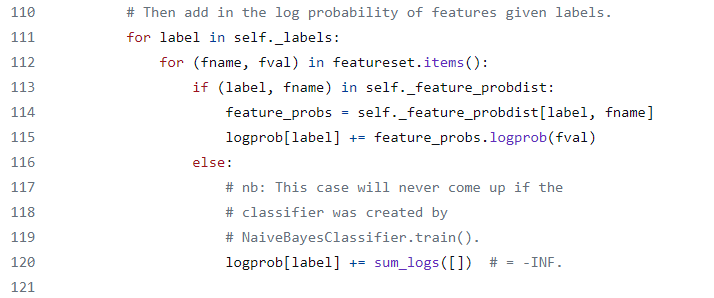
 
 그래서 결국 정확한 결과를 도출해내는 MyNaiveBayesClassifier 클래스를 이용해 분류기 학습을 시키고 위와 같은 정확한 결과를 얻을 수 있었다.

---

# <span style="color:blue">자유주제</span>

### 자유주제 선정 이유

한국 영화 '지금 만나러 갑니다'는 일본 영화 '지금 만나러 갑니다'를 리메이크하여 만든 영화이다. 리메이크하여 만들었지만 사람들의 평가는 갈렸다. 한국판보다는 일본판을 고평가하였다. '무엇이 사람들의 평가를 갈리게 했을까'라는 의문에서 자유주제를 선정했다. 두 영화의 각 평점별 리뷰개수를 세어 두 영화를 전체적으로 사람들이 몇 점으로 평가했는지를 한눈에 비교해 볼 수 있도록 한다. 또 비교한 후에는 어떠한 점들이 사람들이 그런 평가를 내리게 했는지 워드클라우드를 이용하여 그 여론을 알아보려 한다.

### 평점 개수 비교를 위한 배열 만들기

모든 평가를 가져와야 하므로 comment가 있는 배열, 없는 배열 처리를 따로 만들어 전체 리뷰들을 가져오도록 했다.

In [21]:
eval_korea = [] # 단순히 모든 리뷰들을 불러와 (comment, point)형식으로 저장시키기 위한 배열

for evaluation in evaluations:
    if evaluation.find('p') is not None: # comment가 있다면
        comment = evaluation.find('p').text.strip(' \n')
    else:                                 # comment가 없다면
        comment = ''
    point = int(evaluation.find('div').text.strip(' \n'))
    eval_korea.append((comment, point))

일본 영화 '지금 만나러 갑니다' 페이지 불러와서 모든 리뷰가 보이도록 만들기

In [22]:
main_url = "https://movie.daum.net/moviedb/grade?movieId=40832"
driver.get(main_url)

In [23]:
time.sleep(3)
while True:
    try:
        more_xpath = '//*[@id="alex-area"]/div/div/div/div[3]/div[1]/button'
        driver.find_element('xpath', more_xpath).click()
        time.sleep(3)
    except:
        break

## BeautifulSoup을 이용하여 해당 페이지에 있는 리뷰들을 불러와 저장한다.

위에 했던 것과 차별을 주기 위해 변수들 앞에 jp_를 붙여 구분했다.

In [24]:
html = driver.page_source

soup = BeautifulSoup(html, 'html.parser')
jp_evaluations = soup.find_all('div', {'class':'cmt_info'})

eval_japan = [] # 단순히 모든 리뷰들을 불러와 (comment, point)형식으로 저장시키기 위한 배열
jp_all_comment = [] # 워드클라우드를 만들기 위해 comment들만 따로 저장시키기 위한 배열

for evaluation in jp_evaluations:
    if evaluation.find('p') is not None: # comment가 있다면
        comment = evaluation.find('p').text.strip(' \n')
    else:                                 # comment가 없다면
        comment = ''
    point = int(evaluation.find('div').text.strip(' \n'))
    jp_all_comment.append(comment)
    eval_japan.append((comment, point))

tot_korea, tot_japan 변수에 각 평점들을 더해주고 해당 인덱스들에 +1씩 해주어 점수별 개수를 구한다. 이를 바탕으로 평균값도 구할 수 있다.

In [25]:
korea_point_count = [0 for i in range(10)]
japan_point_count = [0 for i in range(10)]

tot_korea = 0
for tup in eval_korea:
    tot_korea += tup[1]
    korea_point_count[tup[1]-1] += 1
avg_korea = tot_korea / len(eval_korea)


tot_japan = 0
for tup in eval_japan:
    tot_japan += tup[1]
    japan_point_count[tup[1]-1] +=1
avg_japan = tot_japan / len(eval_japan)


비교 그래프를 그리기 위한 DataFrame을 만들어냈다.

In [26]:
import pandas as pd

data = {'한국': korea_point_count,
        '일본': japan_point_count}
index_list = ['1점', '2점', '3점', '4점', '5점',
         '6점', '7점', '8점', '9점', '10점']
df = pd.DataFrame(data, index=index_list)
df

,한국,일본
1점,64,6
2점,28,2
3점,28,3
4점,20,3
5점,48,13
6점,46,12
7점,77,35
8점,120,67
9점,168,124
10점,656,704


<AxesSubplot:>

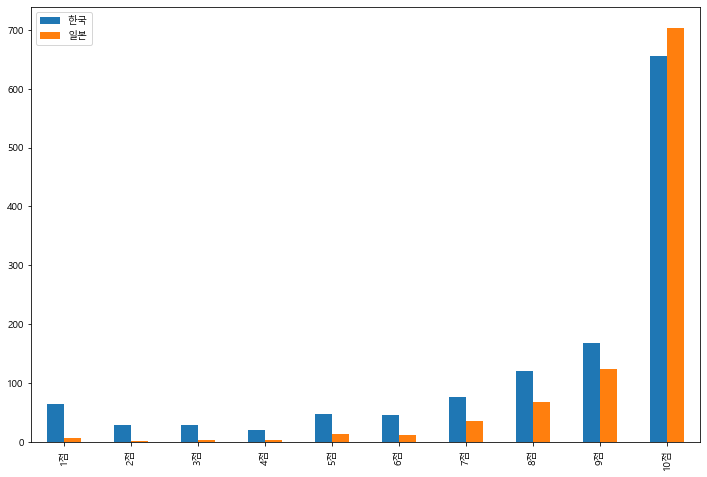

In [27]:
plt.rc('font', family = 'Malgun Gothic')
df.plot(kind='bar',figsize=(12,8))

In [28]:
print('한국 영화 평점 평균 : ', round(avg_korea, 2))
print('일본 영화 평점 평균 : ', round(avg_japan, 2))

한국 영화 평점 평균 :  7.95
일본 영화 평점 평균 :  9.25


막대그래프를 이용하여 두 영화의 평점들의 개수를 비교했다. 일본판은 10점의 개수가 많고 점수가 낮은 평가들이 적다. 한국판은 그에 비해 10점은 비교적 적고 낮은 점수들의 평가들의 개수가 많다.

어떠한 부분에서 한국판을 본 사람들은 실망을 했고, 어떤 점에서 일본판을 본 사람들은 인상 깊게 본지 파악하기 위해 평가들의 워드클라우드를 만들어 사람들의 생각을 알아보려 한다.

In [29]:
jp_pos_comment = []
jp_neg_comment = []

for comment in eval_japan:
    
    if comment[1] > 9:
        jp_pos_comment.append(comment[0])
    elif comment[1] < 6:
        jp_neg_comment.append(comment[0])


In [30]:
jp_all_doc = '\n'.join(jp_all_comment)
jp_all_doc_noun = okt.nouns(jp_all_doc)
jp_all_count = Counter(jp_all_doc_noun)

jp_pos_doc = '\n'.join(jp_pos_comment)
jp_pos_doc_noun = okt.nouns(jp_pos_doc)
jp_pos_count = Counter(jp_pos_doc_noun)

jp_neg_doc = '\n'.join(jp_neg_comment)
jp_neg_doc_noun = okt.nouns(jp_neg_doc)
jp_neg_count = Counter(jp_neg_doc_noun)

wc = WordCloud(background_color='white', max_words=2000, font_path=r'C:\Windows\Fonts\malgun.ttf')



---

### 의미 없는 단어들을 처리하는 과정

In [31]:
stopword_list = ['진짜', '너무', '바로', '엄청', '정말', '완전', '영화'
                , '뭔가', '다시', '평점', '보고']

for short_word in jp_all_count:
    if len(short_word) == 1:
        stopword_list.append(short_word)
        
for stopword in stopword_list:        
    if stopword in jp_pos_count:
        jp_pos_count.pop(stopword) 
        
    if stopword in jp_neg_count:
        jp_neg_count.pop(stopword)

### 일본판 긍정적 리뷰들의 워드클라우드

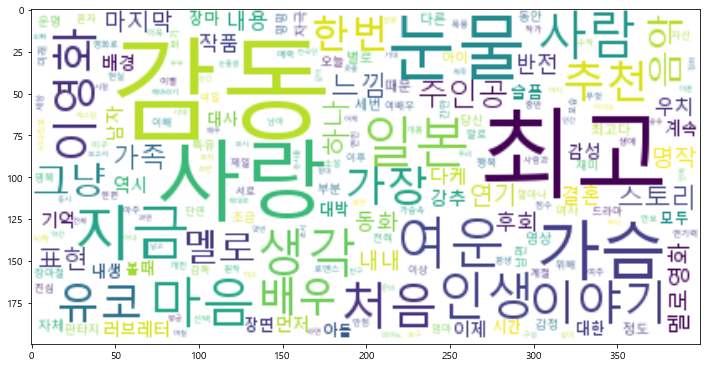

In [32]:
jp_wc_pos = wc.generate_from_frequencies(jp_pos_count)
plt.figure(figsize=(12,8))
plt.imshow(jp_wc_pos, interpolation='bilinear')
plt.show()

### 한국판 긍정적 리뷰 워드클라우드

한국판과 일본판의 여론을 비교하기 위해 지정주제에서 만든 한국판 긍정적인 리뷰 부정적인 리뷰를 가져와 그렸다.

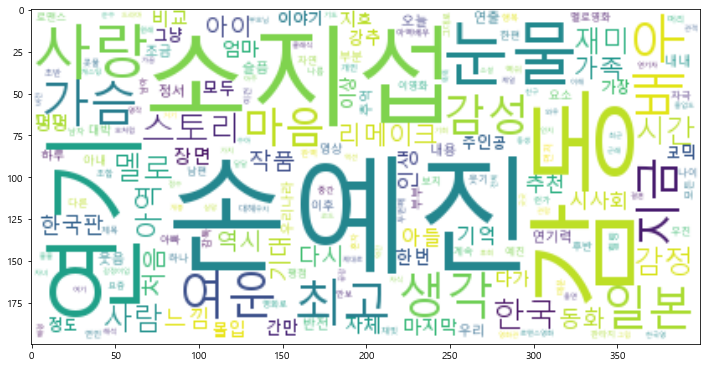

In [33]:
wc_pos = wc.generate_from_frequencies(pos_count)
plt.figure(figsize=(12,8))
plt.imshow(wc_pos, interpolation='bilinear')
plt.show()

---

### 일본판 부정적 리뷰 워드 클라우드

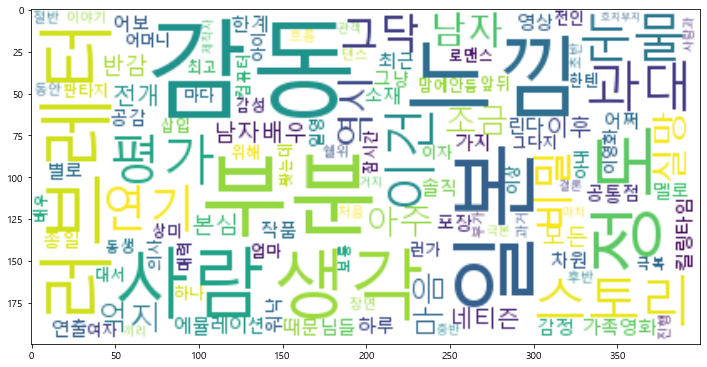

In [34]:
jp_wc_neg = wc.generate_from_frequencies(jp_neg_count)
plt.figure(figsize=(12,8))
plt.imshow(jp_wc_neg, interpolation='bilinear')
plt.show()

### 한국판 부정적 리뷰 워드 클라우드

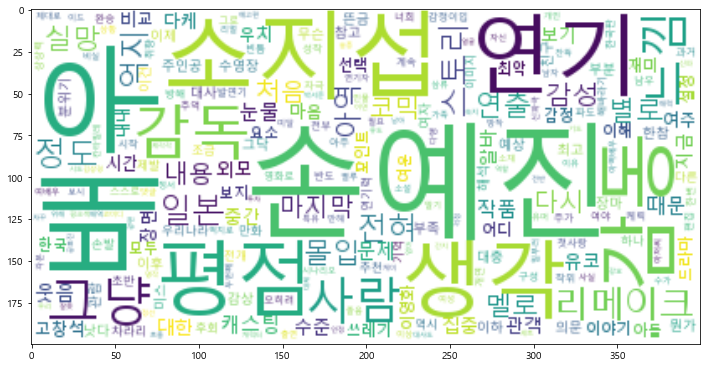

In [35]:
wc_neg = wc.generate_from_frequencies(neg_count)
plt.figure(figsize=(12,8))
plt.imshow(wc_neg, interpolation='bilinear')
plt.show()

한국판 긍정적 리뷰 워드클라우드에서는 볼 수 없고 일본판 긍정적 리뷰 워드클라우드에서만 보이는 단어들을 뽑아보면 유코, 다케, 음악, 러브레터 등이 있다. 배우들 캐스팅에 있어 사람들이 보기에 영화와 잘 어울리는 배우들을 잘 고른 것 같다. 또 음악 선정에 있어 영화 분위기에 맞는 좋은 음악을 선택한 것이 좋은 점수를 받게 하는 요소인 것 같다. 또 유명 일본 영화 러브레터와 비교하며 긍정적인 반응을 보였다.

두 영화의 부정적인 리뷰 워드클라우드를 살펴보면 일본판 워드클라우드에서는 볼 수 없는 리메이크, 연출, 감독, 두 배우들의 이름 등을 한국판에서는 볼 수가 있다. 영화를 감상한 사람들은 두 배우 캐스팅에 대한 불만을 많이 표현했고, 감독의 연출에 대한 내용을 많이 적은 것을 알 수 있다. 또 한국판이 일본판의 리메이크라는 점에서 상대적으로 좋게 평가받는 일본판과 비교당하며 두 배우, 배우들의 연기, 감독의 연출 등에서 사람들이 실망스러움을 느낀 것을 알 수 있다.

이를 통해 두 영화를 보고 사람들이 느꼈던 부분들에 대해 알 수 있었고 왜 선호하고 왜 실망을 하였는지 확인할 수 있었다.

### 기술적인 이슈

자유주제를 하며 고민했던 부분은 어떤 그래프를 써야 두 영화의 평점 비교가 잘 이루어질까 하는 것이었다. 처음에는 barh를 이용해 가운데를 기준으로 양쪽으로 막대그래프를 그려 비교하려 했지만 막상 그려놓고 보니 두 막대그래프의 길이를 직관적으로 비교할 수 없어서 어려움을 느꼈다. 그래서 두 배열을 가지고 DataFrame으로 만들어 올림픽 금, 은, 동 비교를 했던 것처럼 직관적으로 비교할 수 있도록 구현했다. 그렇게 바꾸니까 몇 점짜리 리뷰가 어떤 영화가 더 많은 지 한눈에 확인할 수 있어 좋았다. 그리고 두 그래프를 비교하고 마지막으로 두 영화의 평균 평점을 시각화하여 같이 보이고 싶었는데 그 부분은 구현해내지 못해서 밑에 따로 출력해 두었다.

---

# [지정주제]에 대한 느낀 점 및 자기 평가


이번 과제뿐만 한 학기동안 수업을 들으면서 이렇게 흥미롭고 재미를 느끼며 공부했던 과목이 있었을까 하는 생각을 했다. 막연히 따라하고 공부했던 과목들에 비해 데이터들을 직접 다루고 눈으로 볼 수 있는 결과물을 만들어내니까 수업을 재밌게 따라갈 수 있던 것 같다. 이번 과제를 하면서도 모르면 질문하고 공부하는 과정을 통해 결과물을 도출함으로써 스스로 나름 만족스러운 결과물을 얻은 것 같다.

# [자유주제]에 대한 느낀 점 및 자기 평가


자유주제에서 아쉬운 부분은 워드클라우드 말고 두 영화 리뷰를 더 비교하기 좋은 방법이 있을까 하는 생각이 남는다는 점이다. 이번 과제에서는 두 영화의 평점 분포를 비교하고 왜 그럴까 판단하는 방법으로 워드클라우드를 이용했다. 아무래도 워드클라우드는 글에서의 핵심단어들을 골라내 크기로 그 중요도를 표현하는 방법이다. 지정과제에서는 이 워드클라우드를 가지고 해석하는 과정을 통해 결과를 분석했다. 그래서 이을 이용해 자유주제에서 두 영화 리뷰의 워드클라우드를 가지고 각 영화의 특징이나 특별한 점, 아쉬운 점, 별로인 점들을 파악했다. 아무래도 단어만 뽑아오다 보니 관람객들이 특정 단어를 사용해 작성한 리뷰의 의도를 정확히 파악하기는 어려웠다. 단지 평점이 낮은 리뷰 워드클라우드에 특정 단어가 있음으로써 특정 단어를 쓰는 것은 사람들이 부정적인 말을 쓸 때 특정 단어를 쓰는구나 하는 것을 파악할 뿐이다. 그렇다보니 해석하는 나의 생각이 많이 반영되어 정확한 결과가 아닐 수도 있다는 생각이 들어 자유주제에 대한 아쉬움이 남는다.